In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import matplotlib
import numpy as np
import ternary  

In [2]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/bidding_test")



In [3]:
extension = 'csv'

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]


In [4]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [5]:
#Mertics - FOOD
i =0 

column_names= ['MaxBiddingTime', 'UrgencyWeight','WaitWeight','ProximityWeight','Pct_served','Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
metrics_food = pd.DataFrame(columns=column_names)


for sim_food in df_total_food:
  
  biddingT = sim_food['MaxBiddingTime'][1]
  w_urgency = sim_food['UrgencyWeight'][1]
  w_wait = sim_food['WaitWeight'][1]
  w_proximity = sim_food['ProximityWeight'][1]

  #Compute aveage wait 
  temp_p_served= sim_food.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_food.loc[sim_food['Trip Served']==True].shape[0]
  count_unserved=sim_food.loc[sim_food['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  metrics_food = metrics_food.append(pd.Series([biddingT, w_urgency, w_wait,w_proximity , pct_served_p,average_wait_p, min_wait, max_wait, stdev_wait, q10, q50, q90], index=column_names), ignore_index=True)

  i+=1


print(metrics_food.head())


   MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
0             1.0           0.00        0.00             1.00       100.0   
1             1.0           0.00        1.00             0.00       100.0   
2             1.0           0.75        0.00             0.25       100.0   
3             1.0           0.25        0.75             0.00       100.0   
4             1.0           0.50        0.50             0.00       100.0   

   Avg_wait  Min_wait  Max_wait  Wait_stdv  Q10  Q50  Q90  
0  4.888790       1.5      26.5   2.891770  2.0  4.0  9.0  
1  5.126406       1.5      19.5   2.901675  2.0  4.5  9.0  
2  4.851589       1.5      25.5   2.833722  2.0  4.0  8.5  
3  5.115256       1.5      24.5   2.909756  2.0  4.5  9.0  
4  5.154825       1.5      26.5   2.902712  2.0  4.5  9.0  


In [6]:
#Mertics - user
i =0 

column_names= ['MaxBiddingTime', 'UrgencyWeight','WaitWeight','ProximityWeight','Pct_served','Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
metrics_user = pd.DataFrame(columns=column_names)


for sim in df_total_user:
  
  biddingT = sim['MaxBiddingTime'][1]
  w_urgency = sim['UrgencyWeight'][1]
  w_wait = sim['WaitWeight'][1]
  w_proximity = sim['ProximityWeight'][1]

  #Compute aveage wait 
  temp_p_served= sim.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim.loc[sim['Trip Served']==True].shape[0]
  count_unserved=sim.loc[sim['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  metrics_user = metrics_user.append(pd.Series([biddingT, w_urgency, w_wait,w_proximity , pct_served_p,average_wait_p, min_wait, max_wait, stdev_wait, q10, q50, q90], index=column_names), ignore_index=True)

  i+=1


print(metrics_user.head())

   MaxBiddingTime  UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
0             1.0            0.5        0.50             0.00   99.028306   
1             1.0            0.0        0.75             0.25   97.635135   
2             1.0            0.5        0.00             0.50   99.029126   
3             1.0            0.0        0.50             0.50   97.045167   
4             1.0            0.0        0.25             0.75   98.141892   

   Avg_wait  Min_wait  Max_wait  Wait_stdv  Q10  Q50  Q90  
0  5.243346       0.0      18.5   3.122623  2.0  4.5  9.5  
1  4.875633       0.0      16.0   3.068237  1.5  4.0  9.5  
2  5.124736       0.0      17.0   3.076851  1.5  4.5  9.5  
3  4.781131       0.0      16.5   3.099713  1.5  4.0  9.0  
4  4.850718       0.0      16.0   3.048924  1.5  4.0  9.0  


In [7]:
correlation_matrix = metrics_food[['UrgencyWeight', 'WaitWeight', 'ProximityWeight', 'Pct_served', 'Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50', 'Q90']].corr()

print(correlation_matrix)

                 UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
UrgencyWeight         1.000000   -0.400000        -0.400000         NaN   
WaitWeight           -0.400000    1.000000        -0.400000         NaN   
ProximityWeight      -0.400000   -0.400000         1.000000         NaN   
Pct_served                 NaN         NaN              NaN         NaN   
Avg_wait              0.237677    0.442117        -0.699274         NaN   
Min_wait                   NaN         NaN              NaN         NaN   
Max_wait              0.264121   -0.067759         0.015211         NaN   
Wait_stdv             0.268112    0.450138        -0.375296         NaN   
Q10                        NaN         NaN              NaN         NaN   
Q50                   0.062622    0.413308        -0.688847         NaN   
Q90                  -0.022435    0.399872        -0.381396         NaN   

                 Avg_wait  Min_wait  Max_wait  Wait_stdv  Q10       Q50  \
UrgencyWeight    0.23767

In [8]:
correlation_matrix_u = metrics_user[['UrgencyWeight', 'WaitWeight', 'ProximityWeight', 'Pct_served', 'Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50', 'Q90']].corr()

print(correlation_matrix_u)

                 UrgencyWeight  WaitWeight  ProximityWeight  Pct_served  \
UrgencyWeight         1.000000   -0.400000        -0.400000    0.460404   
WaitWeight           -0.400000    1.000000        -0.400000    0.018061   
ProximityWeight      -0.400000   -0.400000         1.000000   -0.636351   
Pct_served            0.460404    0.018061        -0.636351    1.000000   
Avg_wait              0.598984    0.196355        -0.770932    0.619237   
Min_wait                   NaN         NaN              NaN         NaN   
Max_wait             -0.027432   -0.002110         0.073856   -0.133663   
Wait_stdv             0.301305    0.311516        -0.432584    0.027384   
Q10                   0.243128    0.035926        -0.321664    0.362699   
Q50                   0.478755    0.100791        -0.705534    0.719461   
Q90                   0.440197    0.183802        -0.588474    0.259594   

                 Avg_wait  Min_wait  Max_wait  Wait_stdv       Q10       Q50  \
UrgencyWeight    0.

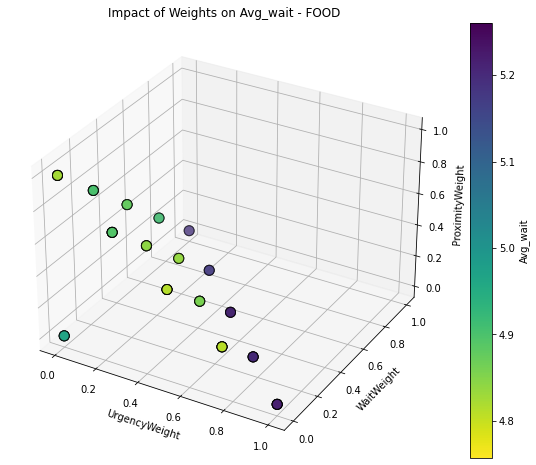

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the data
x = metrics_food['UrgencyWeight']
y = metrics_food['WaitWeight']
z = metrics_food['ProximityWeight']
c = metrics_food['Avg_wait']  # Color based on Avg_wait

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='viridis_r', s=100, edgecolors='k')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Avg_wait')

ax.set_xlabel('UrgencyWeight')
ax.set_ylabel('WaitWeight')
ax.set_zlabel('ProximityWeight')
ax.set_title('Impact of Weights on Avg_wait - FOOD')

plt.show()

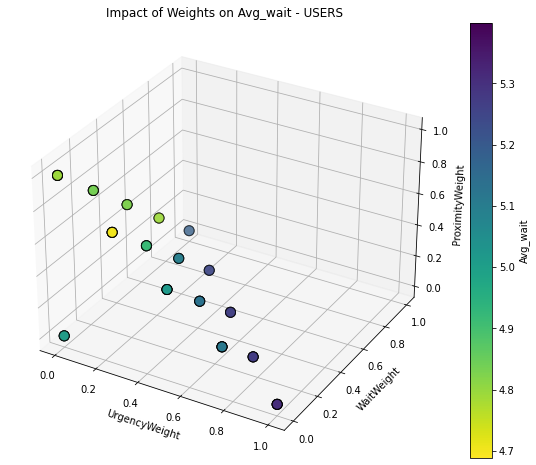

In [10]:


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the data
x = metrics_user['UrgencyWeight']
y = metrics_user['WaitWeight']
z = metrics_user['ProximityWeight']
c = metrics_user['Avg_wait']  # Color based on Avg_wait

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='viridis_r', s=100, edgecolors='k')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Avg_wait')

ax.set_xlabel('UrgencyWeight')
ax.set_ylabel('WaitWeight')
ax.set_zlabel('ProximityWeight')
ax.set_title('Impact of Weights on Avg_wait - USERS')

plt.show()

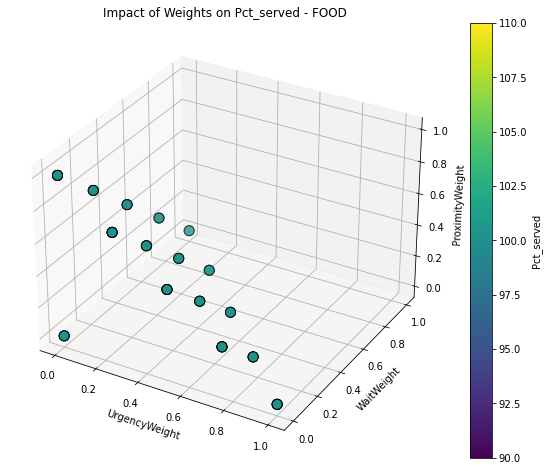

In [11]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the data
x = metrics_food['UrgencyWeight']
y = metrics_food['WaitWeight']
z = metrics_food['ProximityWeight']
c = metrics_food['Pct_served']  # Color based on Pct_served

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=100, edgecolors='k')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Pct_served')

ax.set_xlabel('UrgencyWeight')
ax.set_ylabel('WaitWeight')
ax.set_zlabel('ProximityWeight')
ax.set_title('Impact of Weights on Pct_served - FOOD')

plt.show()

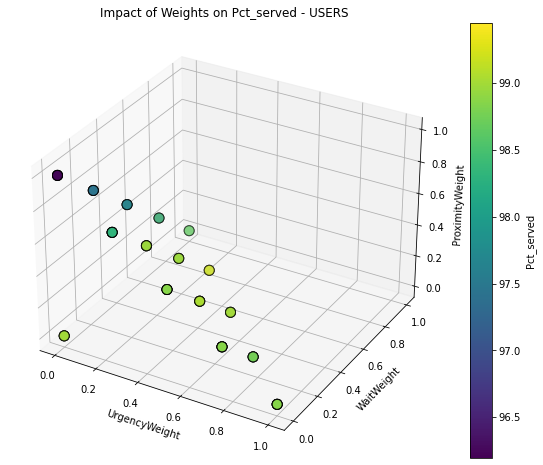

In [12]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the data
x = metrics_user['UrgencyWeight']
y = metrics_user['WaitWeight']
z = metrics_user['ProximityWeight']
c = metrics_user['Pct_served']  # Color based on Pct_served

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=100, edgecolors='k')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Pct_served')

ax.set_xlabel('UrgencyWeight')
ax.set_ylabel('WaitWeight')
ax.set_zlabel('ProximityWeight')
ax.set_title('Impact of Weights on Pct_served - USERS')

plt.show()

In [14]:
condition = (metrics_food['UrgencyWeight'] != 0) | (metrics_food['WaitWeight'] != 0) | (metrics_food['ProximityWeight'] != 0)
filtered_df_food = metrics_food[condition]

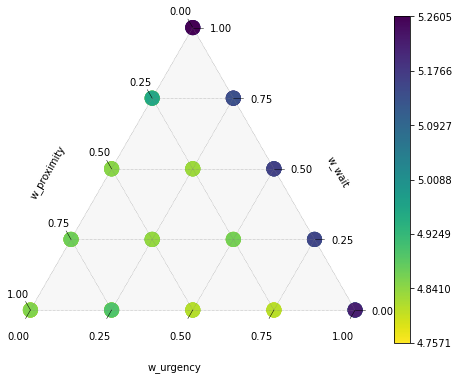

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import ternary
import matplotlib.colors as mcolors


#matplotlib.rcParams['figure.figsize'] = (8, 6)

df = filtered_df_food

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = df['Avg_wait']  # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()


In [122]:
condition = (metrics_user['UrgencyWeight'] != 0) | (metrics_user['WaitWeight'] != 0) | (metrics_user['ProximityWeight'] != 0)
filtered_df_user = metrics_user[condition]

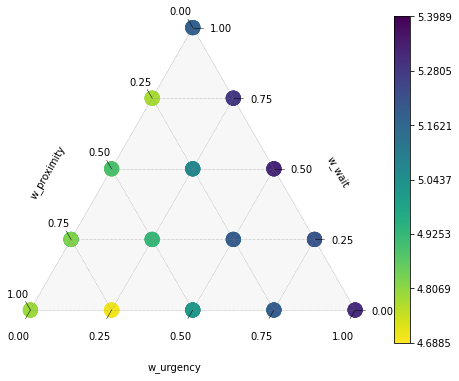

In [123]:
df = filtered_df_user

# Extract the data
x = df['UrgencyWeight']
y = df['WaitWeight']
z = df['ProximityWeight']
avg_wait = df['Avg_wait']  # Color based on Avg_wait


# Normalize 'Avg_wait' values to a range suitable for color mapping
#norm = mcolors.Normalize(vmin=avg_wait.min(), vmax=avg_wait.max())
#c = norm(avg_wait)

# Create a list of tuples for the points
points = [(xi, yi, zi) for xi, yi, zi in zip(x, y, z)]

# Create a ternary plot
scale = 1
figure, tax = ternary.figure(scale=scale)
#tax.resize_drawing_canvas(scale= 2)

#tax.boundary(linewidth=0.1)
tax.gridlines(multiple=0.25, color="gray")
# Set Axis labels and Title
fontsize = 10
offset=0.2
#tax.set_title("Ternary plot - FOOD", fontsize=fontsize)
tax.left_axis_label("w_proximity", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_wait", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_urgency", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=0.5, multiple=0.25, tick_formats="%.2f", offset=0.03)


# Show the scatter plot with colors based on Avg_wait
scatter = tax.scatter(points, colormap=plt.cm.viridis_r, scientific= True, colorbar=True, c=avg_wait, s=200, cmap=plt.cm.viridis_r, vmin=avg_wait.min(), vmax=avg_wait.max())



# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

In [113]:
#Get the parameter ranges
  
biddingT_range = metrics_user['MaxBiddingTime'].unique()
w_urgency_range= metrics_user['UrgencyWeight'].unique()
w_wait_range = metrics_user['WaitWeight'].unique()
w_proximity_range = metrics_user['ProximityWeight'].unique()

print('MaxBiddingTime: ',biddingT_range)
print('UrgencyWeight: ', w_urgency_range)
print('WaitWeight: ', w_wait_range)
print('ProximityWeight: ', w_proximity_range)

MaxBiddingTime:  [1. 0.]
UrgencyWeight:  [0.5  0.   0.25 0.75 1.  ]
WaitWeight:  [0.5  0.75 0.   0.25 1.  ]
ProximityWeight:  [0.   0.25 0.5  0.75 1.  ]


In [114]:
#Set matrix sizes
i_size=biddingT_range.size
j_size=w_urgency_range.size
l_size=w_wait_range.size
k_size=w_proximity_range.size

In [115]:
#We have four variables in two axes i+j combined / k+l combined
x_size= i_size*j_size
y_size=k_size*l_size

#Initialize matrices - Full size

wait_matrix_f=np.zeros((x_size,y_size))
served_matrix_f=np.zeros((x_size,y_size))

wait_matrix_u=np.zeros((x_size,y_size))
served_matrix_u=np.zeros((x_size,y_size))

In [116]:
# Loop to fill in the matrices 

u=-1

for i in range(i_size):

    for j in range(j_size):
        v=0
        u+=1
        for k in range(k_size):
            
            for l in range(l_size):

                #Read values and filter dataframe
                bidT = biddingT_range[i]
                w_u = w_urgency_range[j]
                w_w = w_wait_range[k]
                w_p = w_proximity_range[l]


                #FOOD#
                temp_f=metrics_food.loc[(metrics_food['MaxBiddingTime']==bidT)&(metrics_food['UrgencyWeight']== w_u)&(metrics_food['WaitWeight']== w_w) &(metrics_food['ProximityWeight']== w_p)]
                avg_wait_f = temp_f['Avg_wait'].mean()
                pct_served_f = temp_f['Pct_served'].mean()
              
                #USER#
                temp_u=metrics_user.loc[(metrics_user['MaxBiddingTime']==bidT)&(metrics_user['UrgencyWeight']== w_u)&(metrics_user['WaitWeight']== w_w) &(metrics_user['ProximityWeight']== w_p)]
                avg_wait_u = temp_u['Avg_wait'].mean()
                pct_served_u = temp_u['Pct_served'].mean()
              

                #SAVE DATA
                wait_matrix_f[u,v]=avg_wait_f
                served_matrix_f[u,v]=pct_served_f
                wait_matrix_u[u,v]=avg_wait_u
                served_matrix_u[u,v]=pct_served_u
                
                
                v+=1

In [117]:

#Process the labels for the combined axis
labels_1= []
for i in range(i_size):
    for j in range(j_size):
        labels_1.append([biddingT_range[i],w_urgency_range[j]])

labels_2 =[]

for k in range(k_size):
    for l in range(l_size):
        labels_2.append([w_wait_range[k],w_proximity_range[l]])

#Create grid
yi = np.arange(0, x_size+1) #shift x and y
xi = np.arange(0, y_size+1)
X, Y = np.meshgrid(xi, yi)

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


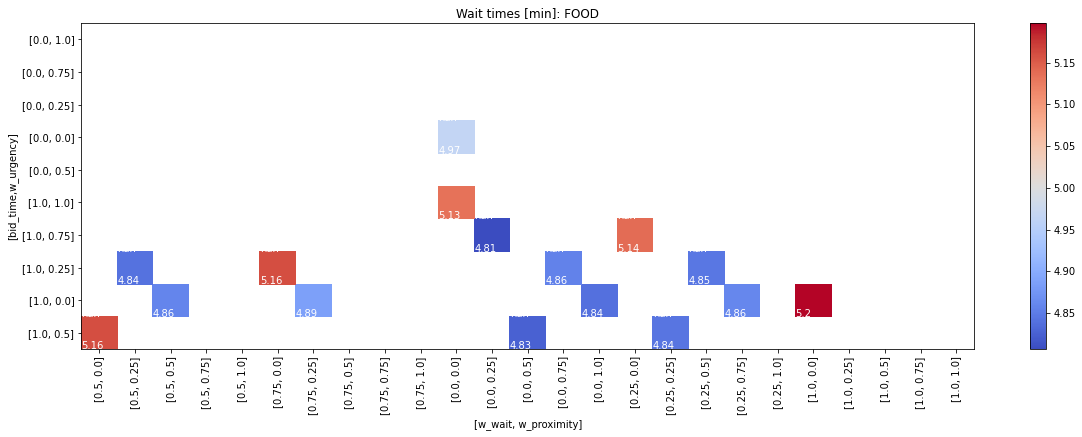

In [118]:
#### FIGURE 1: WAIT TIMES FOOD

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_f,cmap=matplotlib.cm.coolwarm)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_f[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Wait times [min]: FOOD')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


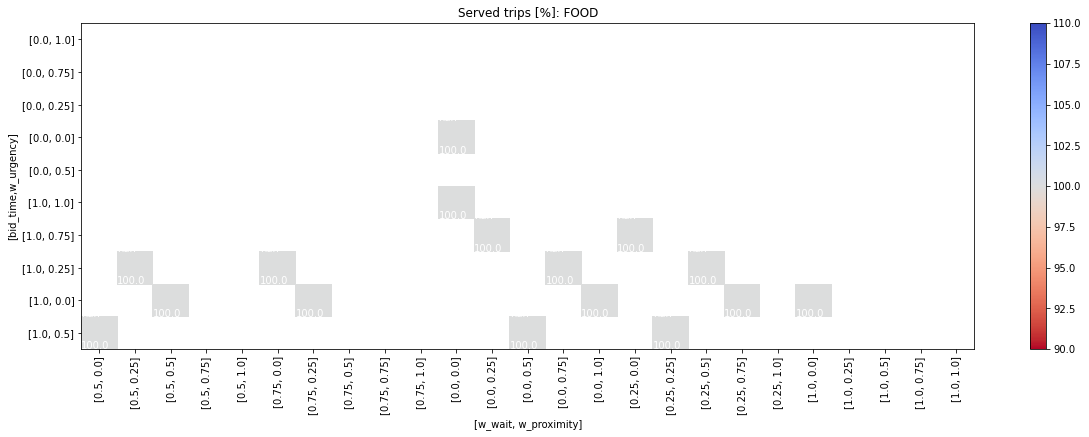

In [119]:
#### FIGURE 2: SERVED TRIPS FOOD

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  served_matrix_f,cmap=matplotlib.cm.coolwarm_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( served_matrix_f[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Served trips [%]: FOOD')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


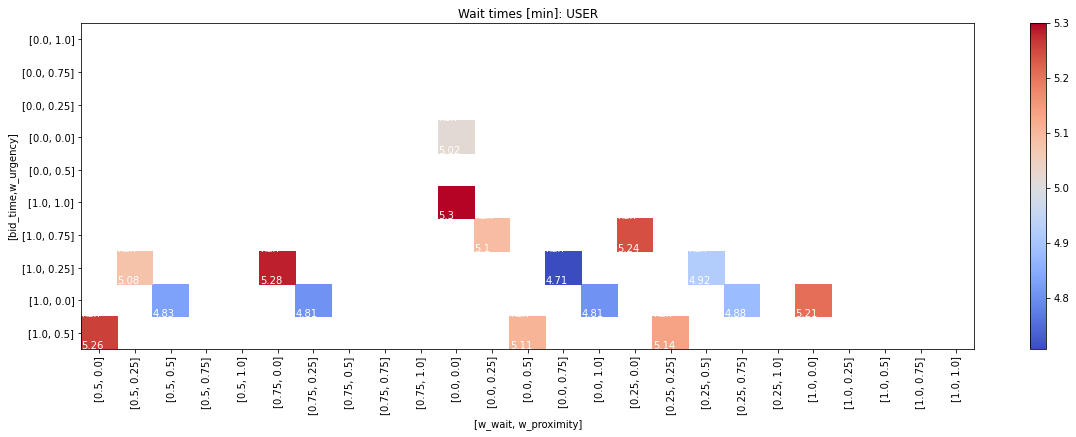

In [120]:
#### FIGURE 1: WAIT TIMES USER

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_u,cmap=matplotlib.cm.coolwarm)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_u[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Wait times [min]: USER')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


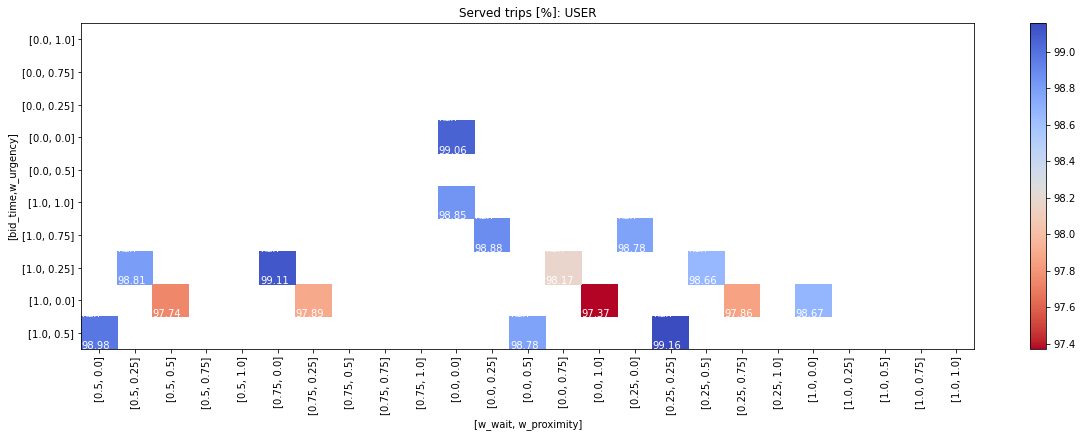

In [121]:
#### FIGURE 2: SERVED TRIPS USER

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  served_matrix_u,cmap=matplotlib.cm.coolwarm_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( served_matrix_u[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[w_wait, w_proximity]")  ################################# REVIEW IF they're not in the opposite order
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[bid_time,w_urgency]")
plt.title('Served trips [%]: USER')
fig.set_size_inches(20, 6)
fig.show()